In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')


import importlib
import imag_axis as imtools
import platonic_solid as positions

c = 3e8
hbar = 1.0545718e-34

# Application to the derivation of collective radiation correction
Here we consider an ensemble of metallic nanoparticles, for which we derive collective radiation corrections and compare the result to the pairwise approach.  

In [2]:
# metallic nanoparticle
R = 20e-9
lambda_P = 136e-9 # value for gold
delta = 0 # plasma model
#delta = 4e-3 # Drude model

omega_P = 2*np.pi*c/lambda_P
k0 = omega_P/(np.sqrt(3)*c)

Gamma = (2/3) * R**3 * k0**4 # represents Gamma/c

## fig 3a - 1D arrays of metallic nanoparticles
Here we recreate fig 3a of the paper, where we consider a 1D array of $N=$3, 4, 6 or 10 nanoparticles. We compute the collective radiation correction, which is the Casimir-Polder energy of the collective system, as a function of the array size. Then we study the evolution of the relative difference with the result obtained from a pairwise approach, that consists in considering each pair of nanoparticles and summing up all the pairwise interaction energies.    

In [3]:
N = 3
pos = np.zeros((3,N))

if N%2==1:
    # N odd
    nei = int((N-1)/2)
    pos[0,:] = np.arange(N)-nei
else:
    # N even
    nei = int(N/2)
    pos[0,:] = np.arange(N)+1/2-nei
print(pos[0,:])

a_vect = np.logspace(np.log10(50), np.log10(1000), 20)*1e-9
E_Cas = 0*a_vect
E_PW = 0*a_vect

[-1.  0.  1.]


In [4]:
for i, a in enumerate(a_vect):
    ak0 = a*k0 # omega_0*a/c
    aGamma = a*Gamma  # Gamma*a/c
    
    I, Ierr = quad(lambda x: imtools.integrand_NP_imagaxis(x,aGamma,ak0,delta,pos), 0, np.inf) 
    E_Cas[i] = I * hbar*c/(2*np.pi*a)

    E_PW[i] = 0
    for m in range(N):
        for n in range(m+1,N):
            I, Ierr = quad(lambda x: imtools.integrand_NP_imagaxis(x,aGamma,ak0,delta,pos[:,[m,n]]), 0, np.inf) 
            E_PW[i] += I * hbar*c/(2*np.pi*a)

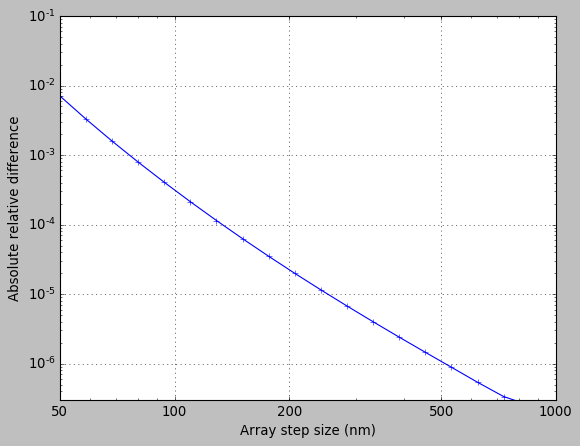

In [5]:
Delta_1D_N3 = np.abs((E_Cas-E_PW)/E_Cas)
style.use('classic')
plt.loglog(a_vect*1e9, Delta_1D_N3, '+-')
plt.xlim(50, 1000)
plt.xticks(ticks=[50, 100, 200, 500, 1000], labels=[50, 100, 200, 500, 1000])
plt.ylim(3e-7, 1e-1)
plt.xlabel("Array step size (nm)")
plt.ylabel("Absolute relative difference")
plt.grid(True)
plt.show()

Gathering the resulting curves with different values of $N$, we get fig3a of the paper: 

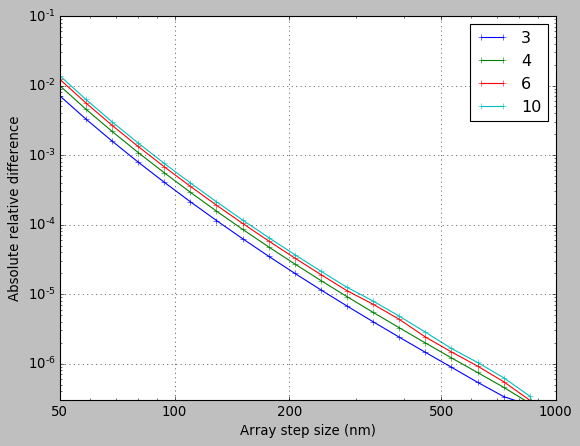

In [121]:
style.use('classic')
plt.loglog(a_vect*1e9,Delta_1D_N3,'+-')
plt.loglog(a_vect*1e9,Delta_1D_N4,'+-')
plt.loglog(a_vect*1e9,Delta_1D_N6,'+-')
plt.loglog(a_vect*1e9,Delta_1D_N10,'+-')
plt.xlim(50, 1000)
plt.xticks(ticks=[50, 100, 200, 500, 1000], labels=[50, 100, 200, 500, 1000])
plt.ylim(3e-7, 1e-1)
plt.xlabel("Array step size (nm)")
plt.ylabel("Absolute relative difference")
plt.grid(True)
plt.legend([3, 4, 6, 10])
#plt.savefig("figures/fig3a.png")
plt.show()

## fig 3b - 2D arrays of nanoparticles
We apply the same procedure to the case of a 2D array of metallic nanoparticles.

In [6]:
Nside = 2
N = Nside**2
pos = np.zeros((3,N))
v = np.arange(N)

if Nside%2==1:
    # N odd
    nei = int((Nside-1)/2)
    pos[0, :] = v%Nside - nei
    pos[1, :] = v//Nside - nei
else:
    # N even
    nei = int(Nside/2)
    pos[0, :] = v%Nside + 1/2 - nei
    pos[1, :] = v//Nside + 1/2 - nei

In [7]:
a_vect = np.logspace(np.log10(50), np.log10(1000), 20)*1e-9
E_Cas = 0*a_vect
E_PW = 0*a_vect

for i, a in enumerate(a_vect):
    ak0 = a*k0 # omega_0*a/c
    aGamma = a*Gamma  # Gamma*a/c
    
    I, Ierr = quad(lambda x: imtools.integrand_NP_imagaxis(x,aGamma,ak0,delta,pos), 0, np.inf) 
    E_Cas[i] = I * hbar*c/(2*np.pi*a)

    E_PW[i] = 0
    for m in range(N):
        for n in range(m+1,N):
            I, Ierr = quad(lambda x: imtools.integrand_NP_imagaxis(x,aGamma,ak0,delta,pos[:,[m,n]]), 0, np.inf) 
            E_PW[i] += I * hbar*c/(2*np.pi*a)

In [8]:
Delta_2D_N4 = np.abs((E_Cas-E_PW)/E_Cas)

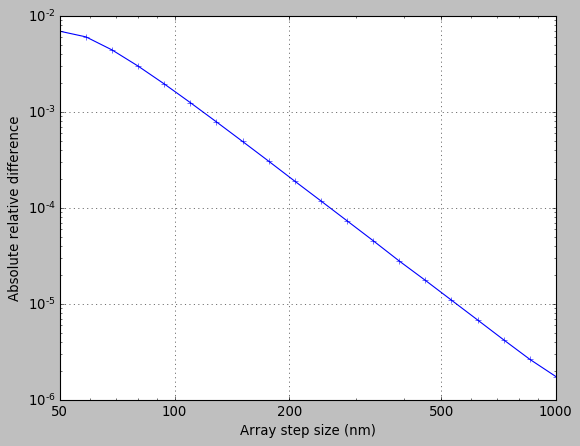

In [9]:
style.use('classic')
plt.loglog(a_vect*1e9, Delta_2D_N4,'+-')
plt.xlim(50, 1000)
plt.xticks(ticks=[50, 100, 200, 500, 1000], labels=[50, 100, 200, 500, 1000])
plt.ylim(1e-6, 1e-2)
plt.xlabel("Array step size (nm)")
plt.ylabel("Absolute relative difference")
plt.grid(True)
plt.show()

Gathering the curves obtained for $N =$ 4, 9 and 16 we get fig 3b of the paper:

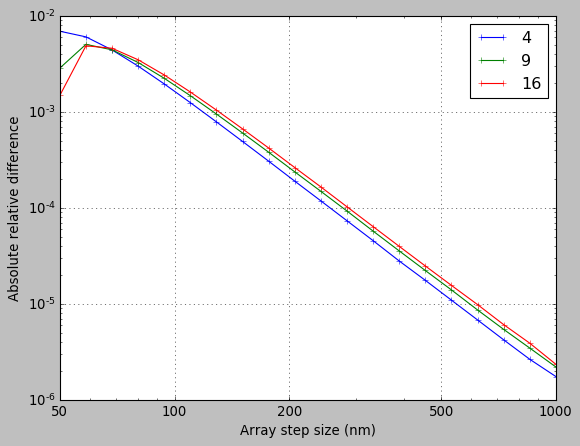

In [122]:
style.use('classic')
plt.loglog(a_vect*1e9, Delta_2D_N4,'+-')
plt.loglog(a_vect*1e9, Delta_2D_N9,'+-')
plt.loglog(a_vect*1e9, Delta_2D_N16,'+-')
plt.xlim(50, 1000)
plt.xticks(ticks=[50, 100, 200, 500, 1000], labels=[50, 100, 200, 500, 1000])
plt.ylim(1e-6, 1e-2)
plt.xlabel("Array step size (nm)")
plt.ylabel("Absolute relative difference")
plt.grid(True)
plt.legend([4, 9, 16])
#plt.savefig("figures/fig3b.png")
plt.show()

## fig 3c - 3D arrays of nanoparticles
We apply the same procedure to the case of a 3D array of metallic nanoparticles.

In [10]:
Nside = 2
N = Nside**3
pos = np.zeros((3,N))
v = np.arange(N)

if Nside%2==1:
    # N odd
    nei = int((Nside-1)/2)
    pos[0, :] = v%Nside - nei
    pos[1, :] = (v%Nside**2)//Nside - nei
    pos[2, :] = v//Nside**2 - nei
else:
    # N even
    nei = int(Nside/2)
    pos[0, :] = v%Nside +1/2 - nei
    pos[1, :] = (v%Nside**2)//Nside +1/2 - nei
    pos[2, :] = v//Nside**2 +1/2 - nei

In [11]:
a_vect = np.logspace(np.log10(50), np.log10(1000), 20)*1e-9
E_Cas = 0*a_vect
E_PW = 0*a_vect

for i, a in enumerate(a_vect):
    ak0 = a*k0 # omega_0*a/c
    aGamma = a*Gamma  # Gamma*a/c
    
    I, Ierr = quad(lambda x: imtools.integrand_NP_imagaxis(x,aGamma,ak0,delta,pos), 0, np.inf) 
    E_Cas[i] = I * hbar*c/(2*np.pi*a)

    E_PW[i] = 0
    for m in range(N):
        for n in range(m+1,N):
            I, Ierr = quad(lambda x: imtools.integrand_NP_imagaxis(x,aGamma,ak0,delta,pos[:,[m,n]]), 0, np.inf) 
            E_PW[i] += I * hbar*c/(2*np.pi*a)

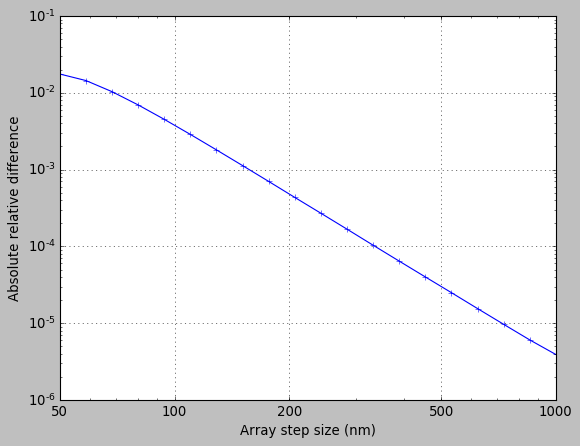

In [12]:
Delta_3D_N8 = np.abs((E_Cas-E_PW)/E_Cas)

style.use('classic')
plt.loglog(a_vect*1e9, Delta_3D_N8,'+-')
plt.xlim(50, 1000)
plt.xticks(ticks=[50, 100, 200, 500, 1000], labels=[50, 100, 200, 500, 1000])
plt.ylim(1e-6, 1e-1)
plt.xlabel("Array step size (nm)")
plt.ylabel("Absolute relative difference")
plt.grid(True)
plt.show()

Again, the curves obtained for $N =$ 8, 27 and 64 we get fig 3c of the paper:

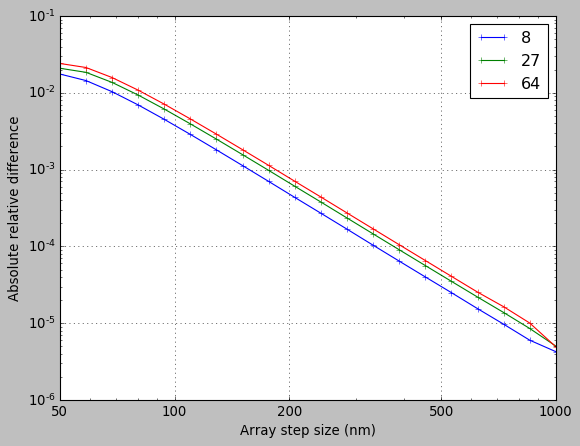

In [123]:
style.use('classic')
plt.loglog(a_vect*1e9, Delta_3D_N8,'+-')
plt.loglog(a_vect*1e9, Delta_3D_N27,'+-')
plt.loglog(a_vect*1e9, Delta_3D_N64,'+-')
plt.xlim(50, 1000)
plt.xticks(ticks=[50, 100, 200, 500, 1000], labels=[50, 100, 200, 500, 1000])
plt.ylim(1e-6, 1e-1)
plt.xlabel("Array step size (nm)")
plt.ylabel("Absolute relative difference")
plt.grid(True)
plt.legend([8, 27, 64])
plt.savefig("figures/fig3c.png")
plt.show()